In [ ]:
!rm -rf rasa
!mkdir rasa
!cd rasa && rasa init --no-prompt

### Start Rasa
Run the following command in terminal to start Rasa:
```
cd rasa
rasa run --enable-api
```

In [1]:
import requests
import json

from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

In [2]:
def create_post_data(msg):
    return {
        'sender': 'test_user',
        'message': msg
    }

In [3]:
def load_image_from_url(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    
    return img

You: Hello there
Bot: Hey! How are you?
You: I'm sad
Bot: Here is something to cheer you up:


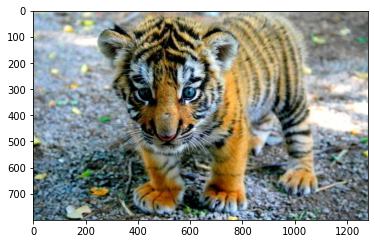

Bot: Did that help you?
You: Yes
Bot: Great, carry on!
You: Goodbye
Bot: Bye
You: /stop


In [4]:
while True:
    message = input("You: ")
    
    if message == "/stop":
        break
    
    data = create_post_data(message)
    
    r = requests.post('http://localhost:5005/webhooks/rest/webhook', data=json.dumps(data))
    
    responses = r.json()
    for response in responses:
        if 'text' in response:
            print("Bot:", response['text'])
        if 'image' in response:
            img = load_image_from_url(response['image'])
            
            plt.figure()
            plt.imshow(img) 
            plt.show()